In [593]:
import pandas as pd
import numpy as np

In [594]:
df=pd.read_csv('train.csv')

In [595]:
df

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume Currency
0,1676588400000,2023-02-16 23:00:00,BTC/USD,24002.33,24098.56,23515.96,23520.73,48.328991,1.136733e+06
1,1676584800000,2023-02-16 22:00:00,BTC/USD,24521.00,24555.40,24000.00,24002.33,41.758527,1.002302e+06
2,1676581200000,2023-02-16 21:00:00,BTC/USD,24562.44,24575.06,24364.72,24521.00,44.653526,1.094949e+06
3,1676577600000,2023-02-16 20:00:00,BTC/USD,24876.29,24886.09,24454.89,24562.44,108.987269,2.676993e+06
4,1676574000000,2023-02-16 19:00:00,BTC/USD,24979.87,24999.77,24846.43,24876.29,50.910118,1.266455e+06
...,...,...,...,...,...,...,...,...,...
64515,1444323600,2015-10-08 17:00:00,BTC/USD,244.25,244.99,244.02,244.99,3.920632,9.605156e+02
64516,1444320000,2015-10-08 16:00:00,BTC/USD,244.92,244.92,244.25,244.25,3.895252,9.514154e+02
64517,1444316400,2015-10-08 15:00:00,BTC/USD,245.00,245.00,244.92,244.92,3.016926,7.389055e+02
64518,1444312800,2015-10-08 14:00:00,BTC/USD,245.00,245.00,244.50,245.00,4.453649,1.091144e+03


In [596]:
df.shape

(64520, 9)

In [597]:
# from datetime import datetime
# df['Date'] = pd.to_datetime(df['Timestamp'], unit = 's')
# df = df.sort_values('Date')
# groups = pd.factorize(df['Date'].dt.day.astype(str) + '_' + df['Date'].dt.month.astype(str) + '_' + df['Date'].dt.year.astype(str))[0]

In [598]:
### Calculate vwap

df['Vwap'] = (df['Volume BTC']*(df['High']+df['Low'])/2).cumsum() / df['Volume BTC'].cumsum()

In [599]:
df = df.sort_values("Date")
btc = df.set_index("Date")

In [600]:
btc

,Unix,Symbol,Open,High,Low,Close,Volume BTC,Volume Currency,Vwap
Date,,,,,,,,,
2015-10-08 13:00:00,1444309200,BTC/USD,0.00,245.00,0.00,245.00,0.606654,1.486303e+02,11329.893700
2015-10-08 14:00:00,1444312800,BTC/USD,245.00,245.00,244.50,245.00,4.453649,1.091144e+03,11329.894537
2015-10-08 15:00:00,1444316400,BTC/USD,245.00,245.00,244.92,244.92,3.016926,7.389055e+02,11329.900619
2015-10-08 16:00:00,1444320000,BTC/USD,244.92,244.92,244.25,244.25,3.895252,9.514154e+02,11329.904739
2015-10-08 17:00:00,1444323600,BTC/USD,244.25,244.99,244.02,244.99,3.920632,9.605156e+02,11329.910059
...,...,...,...,...,...,...,...,...,...
2023-02-16 19:00:00,1676574000000,BTC/USD,24979.87,24999.77,24846.43,24876.29,50.910118,1.266455e+06,24486.473072
2023-02-16 20:00:00,1676577600000,BTC/USD,24876.29,24886.09,24454.89,24562.44,108.987269,2.676993e+06,24395.270174
2023-02-16 21:00:00,1676581200000,BTC/USD,24562.44,24575.06,24364.72,24521.00,44.653526,1.094949e+06,24172.654582


In [601]:
btc.isna().sum()

Unix               0
Symbol             0
Open               0
High               0
Low                0
Close              0
Volume BTC         0
Volume Currency    0
Vwap               0
dtype: int64

In [602]:
btc.describe

<bound method NDFrame.describe of                               Unix   Symbol      Open      High       Low  \
Date                                                                        
2015-10-08 13:00:00     1444309200  BTC/USD      0.00    245.00      0.00   
2015-10-08 14:00:00     1444312800  BTC/USD    245.00    245.00    244.50   
2015-10-08 15:00:00     1444316400  BTC/USD    245.00    245.00    244.92   
2015-10-08 16:00:00     1444320000  BTC/USD    244.92    244.92    244.25   
2015-10-08 17:00:00     1444323600  BTC/USD    244.25    244.99    244.02   
...                            ...      ...       ...       ...       ...   
2023-02-16 19:00:00  1676574000000  BTC/USD  24979.87  24999.77  24846.43   
2023-02-16 20:00:00  1676577600000  BTC/USD  24876.29  24886.09  24454.89   
2023-02-16 21:00:00  1676581200000  BTC/USD  24562.44  24575.06  24364.72   
2023-02-16 22:00:00  1676584800000  BTC/USD  24521.00  24555.40  24000.00   
2023-02-16 23:00:00  1676588400000  BTC/US

In [603]:
btc.dropna(axis=0,inplace=True)

In [604]:
btc.drop(columns=['Unix', 'Symbol', 'Volume Currency'],axis=1,inplace=True)

In [605]:
btc

,Open,High,Low,Close,Volume BTC,Vwap
Date,,,,,,
2015-10-08 13:00:00,0.00,245.00,0.00,245.00,0.606654,11329.893700
2015-10-08 14:00:00,245.00,245.00,244.50,245.00,4.453649,11329.894537
2015-10-08 15:00:00,245.00,245.00,244.92,244.92,3.016926,11329.900619
2015-10-08 16:00:00,244.92,244.92,244.25,244.25,3.895252,11329.904739
2015-10-08 17:00:00,244.25,244.99,244.02,244.99,3.920632,11329.910059
...,...,...,...,...,...,...
2023-02-16 19:00:00,24979.87,24999.77,24846.43,24876.29,50.910118,24486.473072
2023-02-16 20:00:00,24876.29,24886.09,24454.89,24562.44,108.987269,24395.270174
2023-02-16 21:00:00,24562.44,24575.06,24364.72,24521.00,44.653526,24172.654582


In [606]:
print(list(btc))

['Open', 'High', 'Low', 'Close', 'Volume BTC', 'Vwap']


In [607]:
from sklearn.preprocessing import MinMaxScaler

In [608]:
scalerY = MinMaxScaler(feature_range=(0,1))
# btc[['Open', 'High', 'Low', 'Close', 'Volume BTC', 'Vwap']]=scaler.fit_transform(btc[['Open', 'High', 'Low', 'Close', 'Volume BTC', 'Vwap']])

In [609]:
y = btc[['Close']]
y = y.values
y = scalerY.fit_transform(y)
y

array([[2.04698234e-05],
       [2.04698234e-05],
       [1.93001192e-05],
       ...,
       [3.54967207e-01],
       [3.47383576e-01],
       [3.40341957e-01]])

In [610]:
scalerX = MinMaxScaler(feature_range=(0,1))


In [611]:
X = btc.drop(columns=['Close'],axis=1)
X = scalerX.fit_transform(X)
X

array([[0.00000000e+00, 2.03617409e-05, 0.00000000e+00, 7.11471904e-05,
        0.00000000e+00],
       [3.56950541e-03, 2.03617409e-05, 3.57049292e-03, 5.22314878e-04,
        3.12002439e-08],
       [3.56950541e-03, 2.03617409e-05, 3.57662628e-03, 3.53818918e-04,
        2.57753131e-07],
       ...,
       [3.57860255e-01, 3.53879203e-01, 3.55803928e-01, 5.23687457e-03,
        4.78383214e-01],
       [3.57256499e-01, 3.53593265e-01, 3.50477833e-01, 4.89735500e-03,
        4.72895276e-01],
       [3.49699783e-01, 3.46948939e-01, 3.43409279e-01, 5.66792561e-03,
        4.64772540e-01]])

In [612]:
from sklearn.model_selection import train_test_split

In [613]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,shuffle=False)
X_train=np.array(X_train)
y_train=np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [614]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [615]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [616]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 5, 50)             10400     
                                                                 
 lstm_40 (LSTM)              (None, 5, 50)             20200     
                                                                 
 lstm_41 (LSTM)              (None, 50)                20200     
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [617]:
model.fit(X_train,y_train,verbose=1,epochs=15,batch_size=128)

Epoch 1/15
454/454 [==============================] - 8s 8ms/step - loss: 0.0029
Epoch 2/15
454/454 [==============================] - 4s 9ms/step - loss: 3.7140e-05
Epoch 3/15
454/454 [==============================] - 5s 10ms/step - loss: 2.6335e-05
Epoch 4/15
454/454 [==============================] - 4s 9ms/step - loss: 2.0150e-05
Epoch 5/15
454/454 [==============================] - 5s 11ms/step - loss: 1.6280e-05
Epoch 6/15
454/454 [==============================] - 5s 11ms/step - loss: 1.7676e-05
Epoch 7/15
454/454 [==============================] - 4s 9ms/step - loss: 1.4793e-05
Epoch 8/15
454/454 [==============================] - 4s 9ms/step - loss: 1.5513e-05
Epoch 9/15
454/454 [==============================] - 4s 9ms/step - loss: 1.3280e-05
Epoch 10/15
454/454 [==============================] - 4s 9ms/step - loss: 1.2085e-05
Epoch 11/15
454/454 [==============================] - 5s 11ms/step - loss: 1.3213e-05
Epoch 12/15
454/454 [==============================] - 5s 10ms/

In [618]:
import plotly.graph_objects as go
from plotly.offline import iplot

<Axes: >

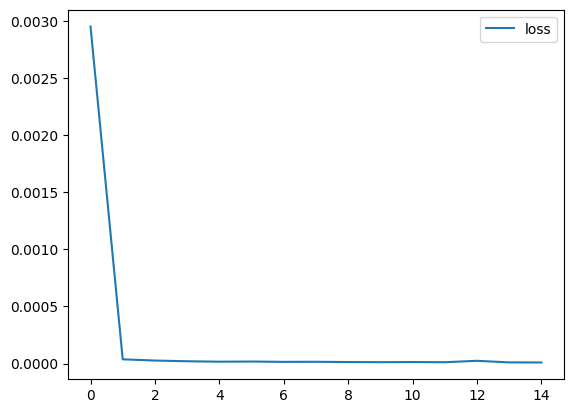

In [619]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [620]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
y_test = np.array(y_test)

In [621]:
testPredict = model.predict(X_test)
testPredict

202/202 [==============================] - 1s 2ms/step


array([[0.4227968 ],
       [0.4230364 ],
       [0.42292508],
       ...,
       [0.35338494],
       [0.35230005],
       [0.34515798]], dtype=float32)

In [622]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(testPredict, y_test)
rmse

3.759535550366277e-06

In [623]:
testPredict = scalerY.inverse_transform(testPredict)
testY = scalerY.inverse_transform(y_test)

In [624]:
testPredict

array([[29160.092],
       [29176.48 ],
       [29168.867],
       ...,
       [24412.783],
       [24338.584],
       [23850.113]], dtype=float32)

In [625]:
from tensorflow.keras.models import save_model
save_model(model, "btc-predict-model.h5")